# Runge Kutta Methods

**Runge Kutta** (RK) methods are one of the most widely used methods for solving ODEs. Recall that the Euler method uses the first two terms in Taylor series to approximate the numerical integration, which is linear:

$$S(t_{j+1}) = S(t_j + h) = S(t_j) + h \cdot S'(t_j)$$

We can greatly improve the accuracy of numerical integration if we keep more terms of the series in:

$$S(t_{j+1}) = S(t_j + h) = S(t_j) + S'(t_j)h + \frac{1}{2!}S''(t_j)h^2 + \cdots + \frac{1}{n!}S^{(n)}(t_j)h^n \label{eq:taylor} \tag{1}$$

In order to get this more accurate solution, we need to derive the expressions of $S''(t_j), S'''(t_j), \cdots, S^{(n)}(t_j)$. This extra work can be avoided using the RK methods, which are based on truncated Taylor series, but do not require computation of these higher derivatives. 

**Reference:** https://pythonnumericalmethods.berkeley.edu/notebooks/chapter22.05-Predictor-Corrector-Methods.html

### Second order Runge Kutta method

Let us first derive the second order RK method. Let $\frac{dS(t)}{dt} = F(t,S(t))$, then we can assume an integration formula the form of 

$$ S(t + h) = S(t) + c_1F(t, S(t))h + c_2F[t+ph, S(t)+qhF(t, S(t))]h \label{eq:integration} \tag{2}$$

We can attempt to find these parameters $c_1, c_2, p, q$ by matching the above equation to the second-order Taylor series, which gives us

$$ S(t + h) =  S(t) + S'(t)h + \frac{1}{2!}S''(t)h^2 = S(t) + F(t, S(t))h + \frac{1}{2!}F'(t, S(t))h^2 \label{eq:matching} \tag{3}$$

Noting that $$F'(t, s(t)) = \frac{\partial F}{\partial t} + \frac{\partial F}{\partial S}\frac{\partial S}{\partial t} = \frac{\partial F}{\partial t} + \frac{\partial F}{\partial S}F$$

Therefore, equation $\eqref{eq:matching}$ can be written as:

$$ S(t + h) = S + Fh + \frac{1}{2!}\Big(\frac{\partial F}{\partial t} + \frac{\partial F}{\partial S}F\Big)h^2 \label{eq:rewrite-matching} \tag{4}$$

In equation $\eqref{eq:integration}$, we can rewrite the last term by applying Taylor series in several variables, which gives us:

$$F[t+ph, S+qhF)] = F + \frac{\partial F}{\partial t}ph + qh\frac{\partial F}{\partial S}F$$
thus equation $\eqref{eq:integration}$ becomes:

$$ S(t + h) = S + (c_1+c_2)Fh + c_1\Big[ \frac{\partial F}{\partial t}p + q\frac{\partial F}{\partial S}F \Big]h^2 \label{eq:rewrite-integration} \tag{5}$$

Comparing equation $\eqref{eq:rewrite-matching}$ and $\eqref{eq:rewrite-integration}$, we can easily obtain: 

$$c_1 + c_2 = 1, \space c_2p=\frac{1}{2}, \space c_2q=\frac{1}{2} \label{eq:result} \tag{6}$$

Because $\eqref{eq:result}$ has four unknowns and only three equations, we can assign any value to one of the parameters and get the rest of the parameters. One popular choice is:

$$c_1 =\frac{1}{2}, \space c_2 =\frac{1}{2}, \space p =1, \space q=1$$

We can also define:
$$
\begin{eqnarray*}
k_1 & = & F(t_j,S(t_j))\\
k_2 & = & F\left(t_j+ph, S(t_j)+qhk_1\right)\\
\end{eqnarray*}
$$

where we will have:

$$S(t_{j+1}) = S(t_j) + \frac{1}{2}(k_1+k_2)h$$


### Fourth-order Runge Kutta method

A classical method for integrating ODEs with a high order of accuracy is the **Fourth Order Runge Kutta** (RK4) method. It is obtained from the Taylor series using similar approach we just discussed in the second-order method. This method uses four points $k_1, k_2, k_3$, and $k_4$. A weighted average of these is used to produce the approximation of the solution. The formula is as follows.

$$
\begin{eqnarray*}
k_1 & = & F(t_j,S(t_j))\\
k_2 & = & F\left(t_j+\frac{h}{2},S(t_j)+\frac{1}{2}k_1h\right)\\
k_3 & = & F\left(t_j+\frac{h}{2},S(t_j)+\frac{1}{2}k_2h\right)\\
k_4 & = & F(t_j+h,S(t_j)+k_3h)
\end{eqnarray*}
$$

Therefore, we will have:

$$
S(t_{j+1}) = S(t_j) + \frac{h}{6}\left(k_1 + 2k_2 + 2k_3 + k_4\right).
$$

As indicated by its name, the RK4 method is fourth-order accurate, or $O(h^4)$.

# ODE exercise:

The differential equation $\frac{dy(t)}{dt} = 3t^2 + \sin(t)$ with initial condition $y(0) = 2$.

(a) Find the analytical solutions using sympy.

(b) Approximate the solution to this initial value problem between 0 and 3 in increments of 0.1 and 0.01 using the 2nd and 4th order Runge-Kutta methods.

(c) Plot the difference between the approximated solutions and the exact solution. 

## (a) Find the analytical solutions using sympy.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

import sympy as sp
from sympy import sin

In [6]:
# Part (a)
# Define symbols

y = sp.symbols("y", cls = sp.Function)
t = sp.symbols("t")

In [7]:
# Define ODE

diffeq = sp.Eq(y(t).diff(t) - 3*t**2 - sin(t), 0)

display(diffeq)

Eq(-3*t**2 - sin(t) + Derivative(y(t), t), 0)

In [8]:
# Solve the ODE:

result = sp.dsolve(diffeq, y(t), ics = {y(0):2})

display(result)

Eq(y(t), t**3 - cos(t) + 3)

### Plotting:

In [11]:
# Define function f(t)

b = 3

y_t = lambda t: t**3 - np.cos(t) + 3 # this is y(t)

# Spacing
h_1 = 0.1
h_2 = 0.01

# t_axis

t_1 = np.arange(0, b + h_1, h_1)
t_2 = np.arange(0, b + h_2, h_2)

# Initial conditions
y0 = 2.

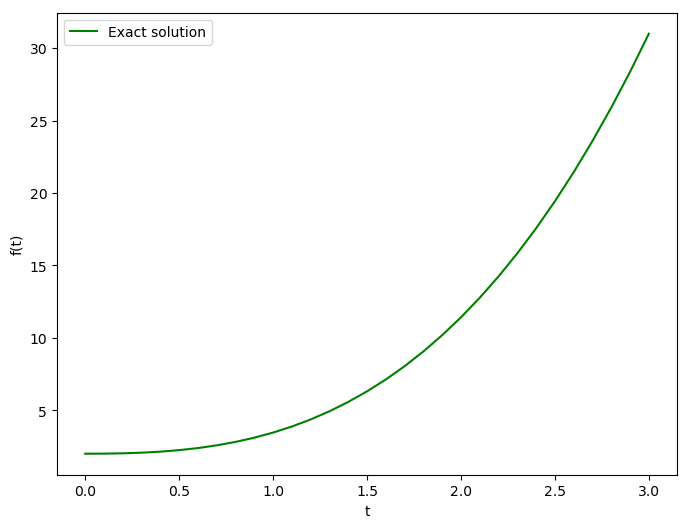

In [12]:
# Plotting

plt.figure(figsize = (8,6))

plt.plot(t_1, y_t(t_1), "g", label = "Exact solution")

plt.xlabel('t')
plt.ylabel('f(t)')

#plt.xlim(-2.0,2.0)
#plt.ylim(-20,20)

plt.legend()
plt.show()

### (b) Approximate the solution to this initial value problem between 0 and 3 in increments of 0.1 and 0.01 using the 2nd and 4th order Runge-Kutta methods.

In [2]:
# Define function f(t)

b = 3

y_t = lambda t: t**3 - np.cos(t) + 3 # this is y(t)

# Spacing
h_1 = 0.1
h_2 = 0.01

# t_axis

t_1 = np.arange(0, b + h_1, h_1)
t_2 = np.arange(0, b + h_2, h_2)

# Initial conditions
y0 = 2.

In [13]:
#Define the slope
def f_ode(t, y):
    
    return 3*t**2 + np.sin(t)

### RK 2:

$$S(t_{j+1}) = S(t_j) + \frac{1}{2}(k_1+k_2)h$$


$$
\begin{eqnarray*}
k_1 & = & F(t_j,S(t_j))\\
k_2 & = & F\left(t_j+ph, S(t_j)+qhk_1\right)\\
\end{eqnarray*}
$$

In [14]:
def RK_2(t_axis, h_step):
    
    # define the y_sln vectors
    y_sln = np.zeros(len(t_axis)) # associated with h

    # add initial conditions
    y_sln[0] = y0

    # loop to fill up y_sln
    for k in range(0, len(t_axis) - 1):
        
        slope_1 = f_ode(t_axis[k], y_sln[k])
        
        slope_2 = f_ode(t_axis[k] + h_step, y_sln[k] + h_step*slope_1)
        
        y_sln[k + 1] = y_sln[k] + h_step*(slope_1 + slope_2)/2
        
    return y_sln


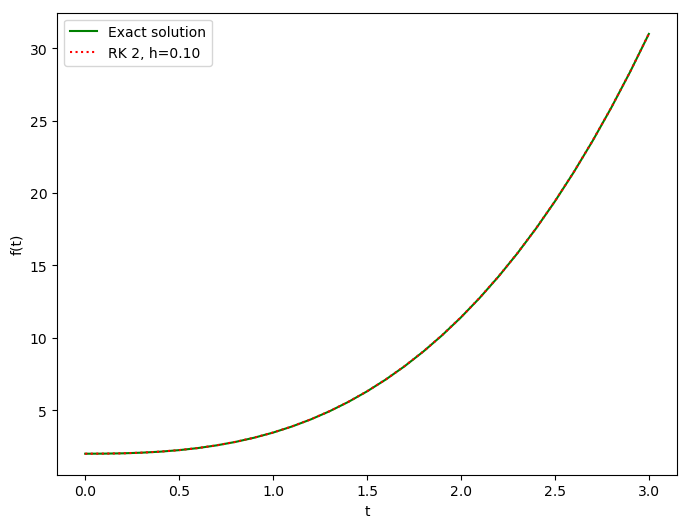

In [15]:
# Plotting

plt.figure(figsize = (8,6))

plt.plot(t_1, y_t(t_1), "g", label = "Exact solution")
plt.plot(t_1, RK_2(t_1, h_1), "r", linestyle =':', label = "RK 2, h=0.10")

plt.xlabel('t')
plt.ylabel('f(t)')

#plt.xlim(-2.0,2.0)
#plt.ylim(-20,20)

plt.legend()
plt.show()

### Error:

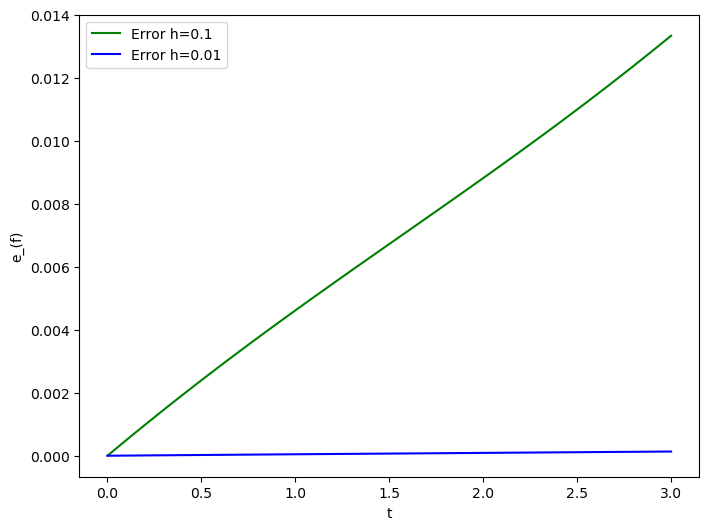

In [19]:
# Plotting

plt.figure(figsize = (8,6))

plt.plot(t_1, RK_2(t_1, h_1) - y_t(t_1), "g", label = "Error h=0.1")
plt.plot(t_2, RK_2(t_2, h_2) - y_t(t_2), "b", label = "Error h=0.01")

plt.xlabel('t')
plt.ylabel('e_(f)')

#plt.xlim(-2.0,2.0)
#plt.ylim(-20,20)

plt.legend()
plt.show()

/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


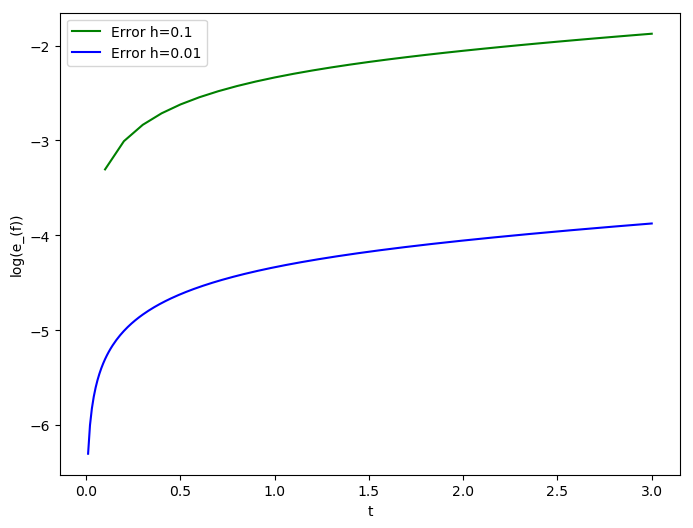

In [24]:
# Plotting

plt.figure(figsize = (8,6))

plt.plot(t_1, np.log10(RK_2(t_1, h_1) - y_t(t_1)), "g", label = "Error h=0.1")
plt.plot(t_2, np.log10(RK_2(t_2, h_2) - y_t(t_2)), "b", label = "Error h=0.01")

plt.xlabel('t')
plt.ylabel('log(e_(f))')

#plt.xlim(-2.0,2.0)
#plt.ylim(-20,20)

plt.legend()
plt.show()

### RK 4:

$$
S(t_{j+1}) = S(t_j) + \frac{h}{6}\left(k_1 + 2k_2 + 2k_3 + k_4\right).
$$

where:

$$
\begin{eqnarray*}
k_1 & = & F(t_j,S(t_j))\\
k_2 & = & F\left(t_j+\frac{h}{2},S(t_j)+\frac{1}{2}k_1h\right)\\
k_3 & = & F\left(t_j+\frac{h}{2},S(t_j)+\frac{1}{2}k_2h\right)\\
k_4 & = & F(t_j+h,S(t_j)+k_3h)
\end{eqnarray*}
$$

In [25]:
def RK_4(t_axis, h_step):
    
    # define the y_sln vectors
    y_sln = np.zeros(len(t_axis)) # associated with h

    # add initial conditions
    y_sln[0] = y0

    # loop to fill up y_sln
    for k in range(0, len(t_axis) - 1):
        
        slope_1 = f_ode(t_axis[k], y_sln[k])
        
        slope_2 = f_ode(t_axis[k] + 0.5*h_step, y_sln[k] + 0.5*h_step*slope_1)
        
        slope_3 = f_ode(t_axis[k] + 0.5*h_step, y_sln[k] + 0.5*h_step*slope_2)
        
        slope_4 = f_ode(t_axis[k] + h_step, y_sln[k] + h_step*slope_3)
        
        y_sln[k + 1] = y_sln[k] + h_step*(slope_1 + 2*slope_2 + 2*slope_3 + slope_4)/6
        
    return y_sln

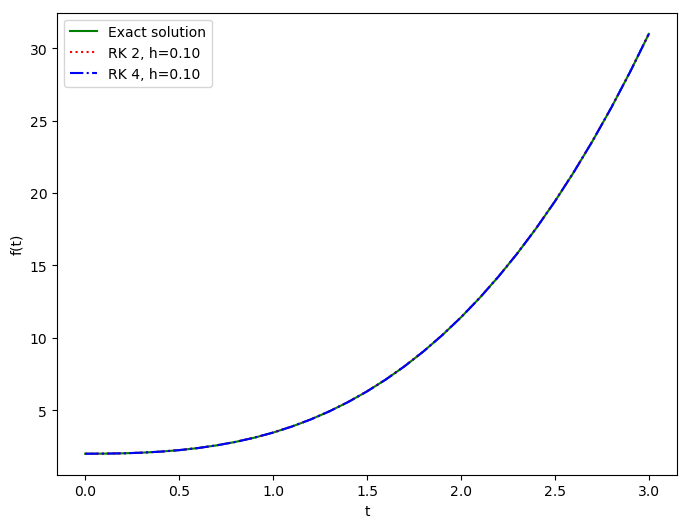

In [26]:
# Plotting

plt.figure(figsize = (8,6))

plt.plot(t_1, y_t(t_1), "g", label = "Exact solution")
plt.plot(t_1, RK_2(t_1, h_1), "r", linestyle =':', label = "RK 2, h=0.10")
plt.plot(t_1, RK_4(t_1, h_1), "b", linestyle ='-.', label = "RK 4, h=0.10")

plt.xlabel('t')
plt.ylabel('f(t)')

#plt.xlim(-2.0,2.0)
#plt.ylim(-20,20)

plt.legend()
plt.show()

### Error:

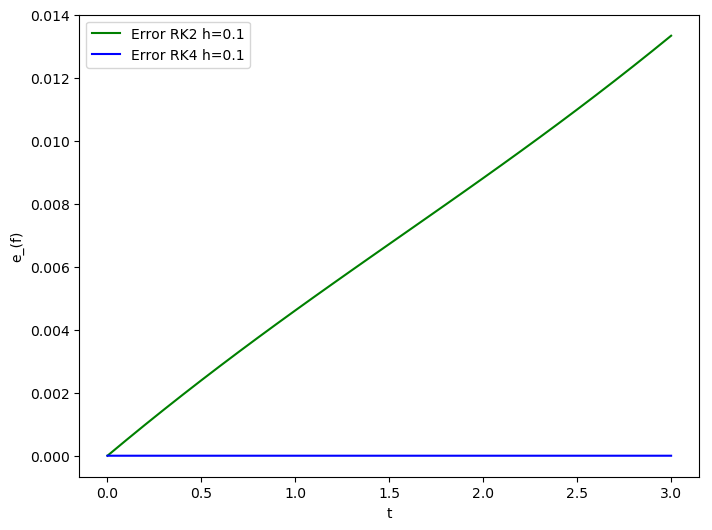

In [27]:
# Plotting

plt.figure(figsize = (8,6))

plt.plot(t_1, RK_2(t_1, h_1) - y_t(t_1), "g", label = "Error RK2 h=0.1")
plt.plot(t_1, RK_4(t_1, h_1) - y_t(t_1), "b", label = "Error RK4 h=0.1")

plt.xlabel('t')
plt.ylabel('e_(f)')

#plt.xlim(-2.0,2.0)
#plt.ylim(-20,20)

plt.legend()
plt.show()

/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


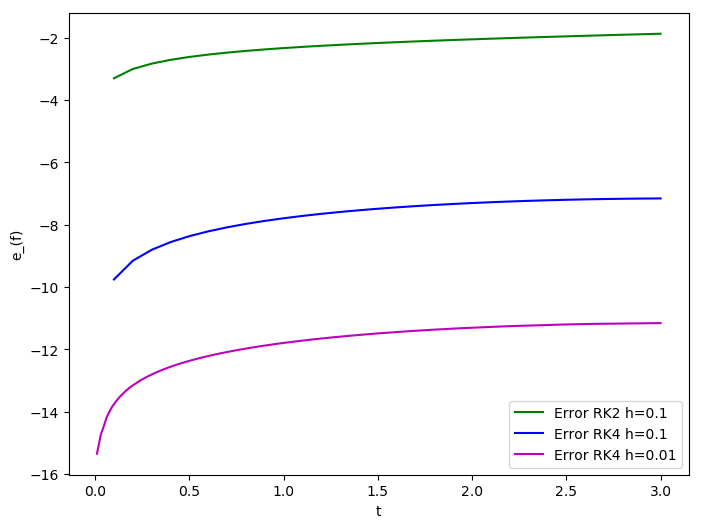

In [30]:
# Plotting

plt.figure(figsize = (8,6))

plt.plot(t_1, np.log10(RK_2(t_1, h_1) - y_t(t_1)), "g", label = "Error RK2 h=0.1")
plt.plot(t_1, np.log10(RK_4(t_1, h_1) - y_t(t_1)), "b", label = "Error RK4 h=0.1")
plt.plot(t_2, np.log10(RK_4(t_2, h_2) - y_t(t_2)), "m", label = "Error RK4 h=0.01")

plt.xlabel('t')
plt.ylabel('e_(f)')

#plt.xlim(-2.0,2.0)
#plt.ylim(-20,20)

plt.legend()
plt.show()